# Recovery Homework

created by PSJL september 24, 2025

Libraries to use

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge

## Content

### Polynomial regression

In [2]:
def fit_polynomial_models(x_train, y_train, x_test, y_test, degree_range=range(2, 10)):
    """
    Fit polynomial regression models for multidata.
    """
    best_mse_test = np.inf
    best_mse_train = None
    best_pred = None
    best_degree = None
    best_model = None

    for degree in degree_range:
        # Use PolynomialFeatures for multidimensional data
        pipeline = make_pipeline(
            StandardScaler(),
            PolynomialFeatures(degree=degree, include_bias=False),
            LinearRegression()
        )

        pipeline.fit(x_train, y_train)
        y_train_pred = pipeline.predict(x_train)
        y_test_pred = pipeline.predict(x_test)

        mse_tr = mean_squared_error(y_train, y_train_pred)
        mse_te = mean_squared_error(y_test, y_test_pred)

        if mse_te < best_mse_test:
            best_mse_test = mse_te
            best_mse_train = mse_tr
            best_pred = y_test_pred
            best_degree = degree
            best_model = pipeline

    roundN = 5
    return {
        "Name": f"Polynomial (degree = {best_degree})",
        "MSE_train": round(float(best_mse_train), roundN),
        "MSE_test": round(float(best_mse_test), roundN),
        "Y_pred": best_pred,
        "Model": best_model
    }

### Kernel regression using KernelRidge

In [ ]:
def fit_kernel_ridge_models(x_train, y_train, x_test, y_test,
                           alpha_range = np.logspace(-6, 1, 20),
                           gamma_range = np.logspace(-3, 2, 20)):
    """
    Fit Kernel Ridge regression models using sklearn's implementation.
    More stable and optimized than manual implementation.
    """
    best_mse_test = np.inf
    best_mse_train = None
    best_pred = None
    best_params = None
    best_model = None
    roundN = 4

    for alpha in alpha_range:
        for gamma in gamma_range:
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(x_train)
            X_test_scaled = scaler.transform(x_test)
            model = KernelRidge(alpha=alpha, kernel='rbf', gamma=gamma)

            model.fit(X_train_scaled, y_train)
            
            y_pred_train = model.predict(X_train_scaled)
            y_pred_test = model.predict(X_test_scaled)
                
            mse_train = mean_squared_error(y_train, y_pred_train)
            mse_test = mean_squared_error(y_test, y_pred_test)
                
            if mse_test < best_mse_test:
                best_mse_test = mse_test
                best_pred = y_pred_test
                best_mse_train = mse_train
                best_params = f"alpha = {round(float(alpha), roundN)}, gamma= {round(float(gamma), roundN)}"
                best_model = model
    
    return {
        "Name": f"Kernel Ridge ({best_params})",
        "MSE_train": round(float(best_mse_train, roundN)),
        "MSE_test": round(float(best_mse_test, roundN)),
        "Y_pred": best_pred,
        "Model": best_model
    }

### General Regression Neuronal Networks (GRNN)

In [1]:
class GRNN:
    def __init__(self, sigma=0.1):
        self.sigma = sigma
    
    def fit(self, X, y):
        # Store data of training
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    
    def predict(self, X):
        X = np.array(X)
        y_pred = []
        
        for x in X:
            # Euclidean distances to all training points
            dists = np.linalg.norm(self.X_train - x, axis=1)
            
            # Gaussian Kernel
            weights = np.exp(-(dists**2) / (2 * self.sigma**2))
            
            # Weighted average
            y_hat = np.sum(weights * self.y_train) / np.sum(weights)
            y_pred.append(y_hat)
        
        return np.array(y_pred)

In [ ]:
def fit_grnn_models(x_train, y_train, x_test, y_test, )

Load dataset

In [ ]:
# Load the dataset
filepath = "Concrete_Data.xls"

try:
    df = pd.read_excel(filepath)
    print("file read successfully.")
    #rename the columns
    df.columns = ['cement', 'slag', 'fly_ash', 'water', 'superplasticizer',
                'coarse_agg', 'fine_agg', 'age', 'strength']

except ImportError as e:
    print("Import error:", e)
    print("Make sure you have 'xlrd' installed.")

except FileNotFoundError:
    print(f"The file '{filepath}' not found. Check the path.")

except Exception as e:
    print("Error to reading the Excel file:")
    print(e)

file read successfully.


Split data for training and testing

In [12]:
# Compressive Strength (MPa) is the TARGET
X = df.drop('strength', axis=1)
y = df['strength']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(824, 8) (206, 8) (824,) (206,)


Plot different comparison for multivariate data

In [8]:
def plot_predictions_vs_test(y_test, y_pred_poly, y_pred_kernel):
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred_poly, alpha=0.6, label="Polynomial (deg=3)")
    plt.scatter(y_test, y_pred_kernel, alpha=0.6, label="Kernel Ridge (RBF)")
    plt.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            'r--', lw=2, label="Perfect Prediction")

    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.title("Predicted vs Actual Concrete Strength")
    plt.show()

In [23]:
def plot_features_vs_target(X_test,y_test, y_pred_poly, y_pred_kr, name_columns):
    fig, axes = plt.subplots(4, 2, figsize=(10, 20))

    for row in range(0, axes.shape[0]):
        for col in range(0, axes.shape[1]):
            feature_id = row*axes.shape[1] + col
            axes[row, col].scatter(X_test.iloc[:, feature_id], y_test, label="Actual")
            axes[row, col].scatter(X_test.iloc[:, feature_id], y_pred_kr, label="KR Prediction", alpha=0.7)
            axes[row, col].scatter(X_test.iloc[:, feature_id], y_pred_poly, label="Poly Prediction", alpha=0.7)
            axes[row, col].set_xlabel(f"Feature {name_columns[feature_id]}")
            axes[row, col].set_ylabel("Concrete Strength (MPa)")
            axes[row, col].legend()

    plt.tight_layout()
    plt.show()

## Results

In [9]:
results = []

# Run the regression models
results.append(fit_polynomial_models(X_train, y_train, X_test, y_test))
results.append(fit_kernel_ridge_models(X_train, y_train, X_test, y_test))

In [10]:
print("Concrete_Data\n")
df_res = pd.DataFrame(results)
print(df_res.drop(columns=['Y_pred', 'Model']))

Concrete_Data

                                           Name  MSE_train  MSE_test
0                       Polynomial (degree = 3)   19.57734  40.27107
1  Kernel Ridge (alpha = 0.0264, gamma= 0.1274)   13.02960  31.40690


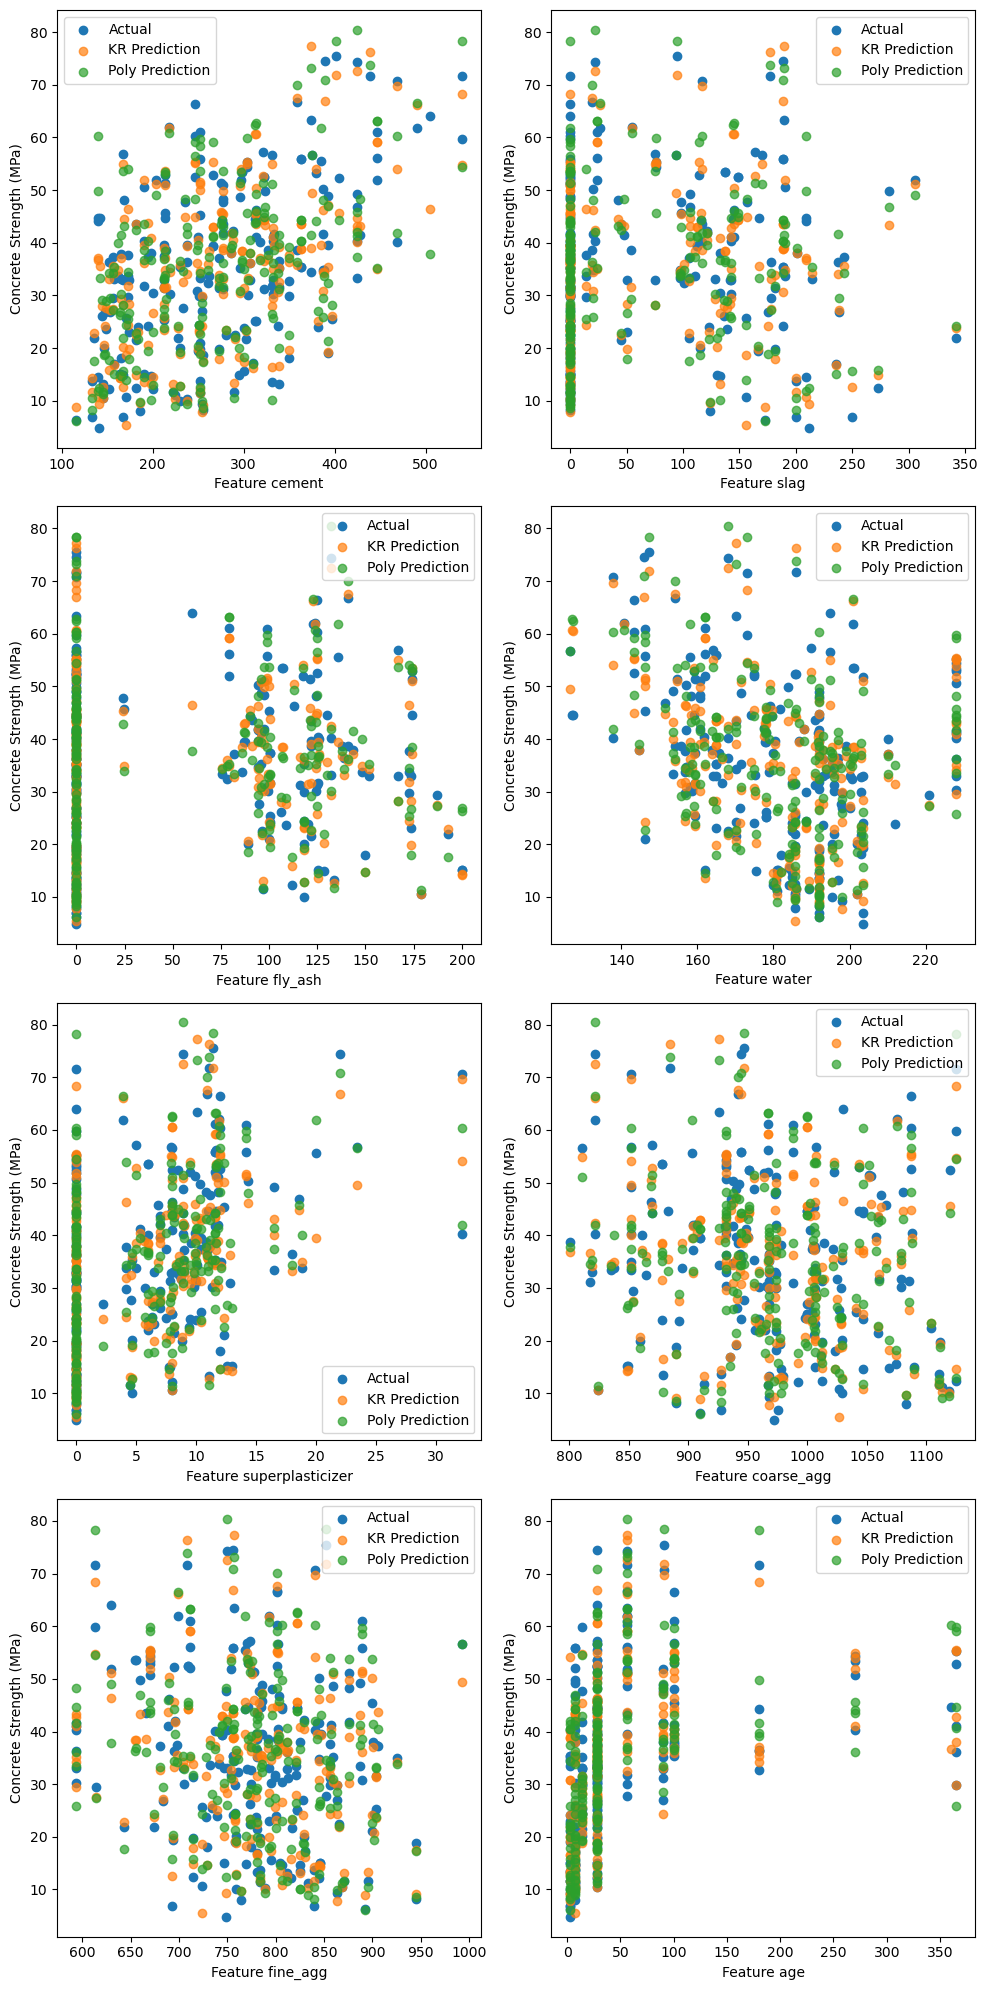

In [24]:
plot_features_vs_target(X_test, y_test, df_res["Y_pred"][0], df_res["Y_pred"][1], df.columns)

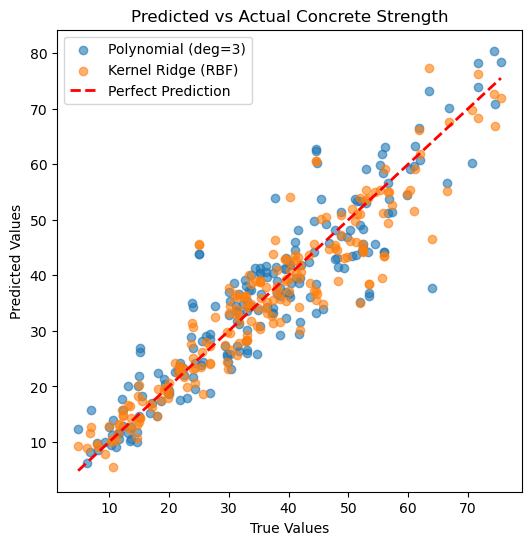

In [11]:
# Predictions vs. y_test ​​(scatter plot)
plot_predictions_vs_test(y_test, df_res["Y_pred"][0], df_res["Y_pred"][1])

## Conclusions

* The polynomial model (degree = 3) starts to overfit.
* The kernel model generalizes better, maintaining a smaller gap

* Best polynomial model: degree = 3 → Test MSE = 40.27
* Best kernel regression model: KRR with alpha = 0.0264, gamma = 0.1274 → Test MSE = 31.41

Futhermore, the Best overall model: **Kernel Ridge Regression**

## References
Yeh, I. (1998). Concrete Compressive Strength [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5PK67.